In [1]:
import pandas as pd
data = pd.read_excel('Coffee Shop Sales.xlsx')

In [3]:
data   

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [7]:
data.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [31]:
#Now we check for null values (there are none)

In [9]:
data.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [37]:
#We add a week day column

In [11]:
data['week day'] = data['transaction_date'].dt.strftime('%A')

In [13]:
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,week day
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,Sunday
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,Sunday
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,Sunday
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,Sunday


In [45]:
#We add time period column

In [15]:
data['time period'] = data['transaction_time'].apply(lambda x : 'morning' if 6 <= x.hour < 12 else('afternoon' if 12 <= x.hour < 18 else 'evening'))

In [17]:
data.tail()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,week day,time period
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,Friday,evening
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,Friday,evening
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,Friday,evening
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,Friday,evening
149115,149456,2023-06-30,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup,Friday,evening


In [51]:
# Which month has the highest sales?  Month 6 (June) is the month with the highest sales (50,942)

In [19]:
data.groupby(data['transaction_date'].dt.strftime('%m'))['transaction_qty'].sum()

transaction_date
01    24870
02    23550
03    30406
04    36469
05    48233
06    50942
Name: transaction_qty, dtype: int64

In [55]:
# Which time of the day are sales the most active? The 'morning' is the most active, with 117,629 transactions.

In [21]:
data.groupby(data['time period'])['transaction_qty'].sum()

time period
afternoon     76540
evening       20301
morning      117629
Name: transaction_qty, dtype: int64

In [59]:
# Which store has the highest number of sales? The 'Hell's Kitchen' store has the highest number, with 50,735 sales.

In [23]:
data.groupby(data['store_location'])['transaction_qty'].count()

store_location
Astoria            50599
Hell's Kitchen     50735
Lower Manhattan    47782
Name: transaction_qty, dtype: int64

In [63]:
# What are the different product categories? 'Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
#     'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'

In [25]:
data.product_category.unique()

array(['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours',
       'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded'],
      dtype=object)

In [ ]:
# Which category has the highest sales? 'Coffee' has the highest sales, with 89,250 transactions.

In [27]:
data.groupby('product_category')['transaction_qty'].sum().sort_values()

product_category
Packaged Chocolate      487
Branded                 776
Loose Tea              1210
Coffee beans           1828
Flavours              10511
Drinking Chocolate    17457
Bakery                23214
Tea                   69737
Coffee                89250
Name: transaction_qty, dtype: int64

In [71]:
# Which product type has the highest sales? The 'Brewed Chai Tea' has the highest sales, with 17,183 transactions.

In [29]:
data.groupby('product_type')['transaction_qty'].count().sort_values(ascending = False)

product_type
Brewed Chai tea          17183
Gourmet brewed coffee    16912
Barista Espresso         16403
Hot chocolate            11468
Brewed Black tea         11350
Brewed herbal tea        11245
Scone                    10173
Organic brewed coffee     8489
Drip coffee               8477
Premium brewed coffee     8135
Pastry                    6912
Biscotti                  5711
Brewed Green tea          5671
Regular syrup             4979
Sugar free syrup          1811
Housewares                 526
Chai tea                   443
Organic Beans              415
Gourmet Beans              366
Premium Beans              336
Espresso Beans             319
Herbal tea                 305
Black tea                  303
Drinking Chocolate         266
Organic Chocolate          221
Clothing                   221
House blend Beans          183
Green tea                  159
Green beans                134
Name: transaction_qty, dtype: int64

In [79]:
# Which product has the most sales in the morning? The 'Brewed Chai Tea' is the most active in the morning, 
# with 8,997 transactions.

In [31]:
data.loc[data['time period'] == 'morning'].groupby('product_type')['transaction_qty'].count().sort_values()

product_type
Green beans                94
Green tea                 108
House blend Beans         130
Organic Chocolate         134
Clothing                  139
Black tea                 188
Drinking Chocolate        188
Herbal tea                212
Espresso Beans            227
Gourmet Beans             232
Premium Beans             233
Organic Beans             267
Chai tea                  289
Housewares                322
Sugar free syrup         1210
Brewed Green tea         3006
Biscotti                 3217
Regular syrup            3488
Premium brewed coffee    4302
Pastry                   4384
Drip coffee              4430
Organic brewed coffee    4485
Scone                    5756
Hot chocolate            5955
Brewed herbal tea        6013
Brewed Black tea         6024
Gourmet brewed coffee    8841
Barista Espresso         8880
Brewed Chai tea          8997
Name: transaction_qty, dtype: int64

In [83]:
# Which product is the most active during the afternoon? The 'Gourmet brewed coffee' is the most active 
# with 6,406 transactions.

In [33]:
data.loc[data['time period'] == 'afternoon'].groupby('product_type')['transaction_qty'].count().sort_values()

product_type
Green beans                34
House blend Beans          40
Green tea                  42
Drinking Chocolate         53
Espresso Beans             57
Clothing                   61
Black tea                  79
Organic Chocolate          79
Herbal tea                 79
Premium Beans              81
Gourmet Beans             106
Organic Beans             115
Chai tea                  116
Housewares                161
Sugar free syrup          478
Regular syrup            1205
Pastry                   1970
Biscotti                 2004
Brewed Green tea         2135
Premium brewed coffee    3059
Drip coffee              3135
Organic brewed coffee    3173
Scone                    3526
Brewed Black tea         4130
Brewed herbal tea        4158
Hot chocolate            4374
Barista Espresso         5944
Brewed Chai tea          6372
Gourmet brewed coffee    6406
Name: transaction_qty, dtype: int64

In [89]:
# Which product is the most active in the evening? The 'Brewed chai tea' is the most active during the evening, 
# with 1,814 transactions.

In [35]:
data.loc[data['time period'] == 'evening'].groupby('product_type')['transaction_qty'].count().sort_values()

product_type
Green beans                 6
Organic Chocolate           8
Green tea                   9
House blend Beans          13
Herbal tea                 14
Clothing                   21
Premium Beans              22
Drinking Chocolate         25
Gourmet Beans              28
Organic Beans              33
Espresso Beans             35
Black tea                  36
Chai tea                   38
Housewares                 43
Sugar free syrup          123
Regular syrup             286
Biscotti                  490
Brewed Green tea          530
Pastry                    558
Premium brewed coffee     774
Organic brewed coffee     831
Scone                     891
Drip coffee               912
Brewed herbal tea        1074
Hot chocolate            1139
Brewed Black tea         1196
Barista Espresso         1579
Gourmet brewed coffee    1665
Brewed Chai tea          1814
Name: transaction_qty, dtype: int64

In [97]:
# Which day of the week has the highest number of sales? Monday has the highest number of sales,
# with 31,231 transactions.

In [37]:
data.groupby('week day')['transaction_qty'].sum().sort_values(ascending = False)

week day
Monday       31231
Friday       31207
Thursday     31162
Wednesday    30625
Tuesday      30449
Sunday       30182
Saturday     29614
Name: transaction_qty, dtype: int64

In [9]:
#We are going to try to add some charts 

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# We transform 'transaction date' into 'datetime'

In [41]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'])

In [17]:
# We group by date and sum sales

In [43]:
sales_data = data.groupby('transaction_date')['transaction_qty'].sum().reset_index()

In [45]:
sales_data

,transaction_date,transaction_qty
0,2023-01-01,802
1,2023-01-02,790
2,2023-01-03,823
3,2023-01-04,726
4,2023-01-05,778
...,...,...
176,2023-06-26,1837
177,2023-06-27,1962
178,2023-06-28,1531
179,2023-06-29,1429


In [25]:
# Charts. We customize title and axis labels

C:\Users\gusta\AppData\Local\Temp\ipykernel_3184\3582433000.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='transaction_date', y='transaction_qty', data=sales_data, palette='dark')


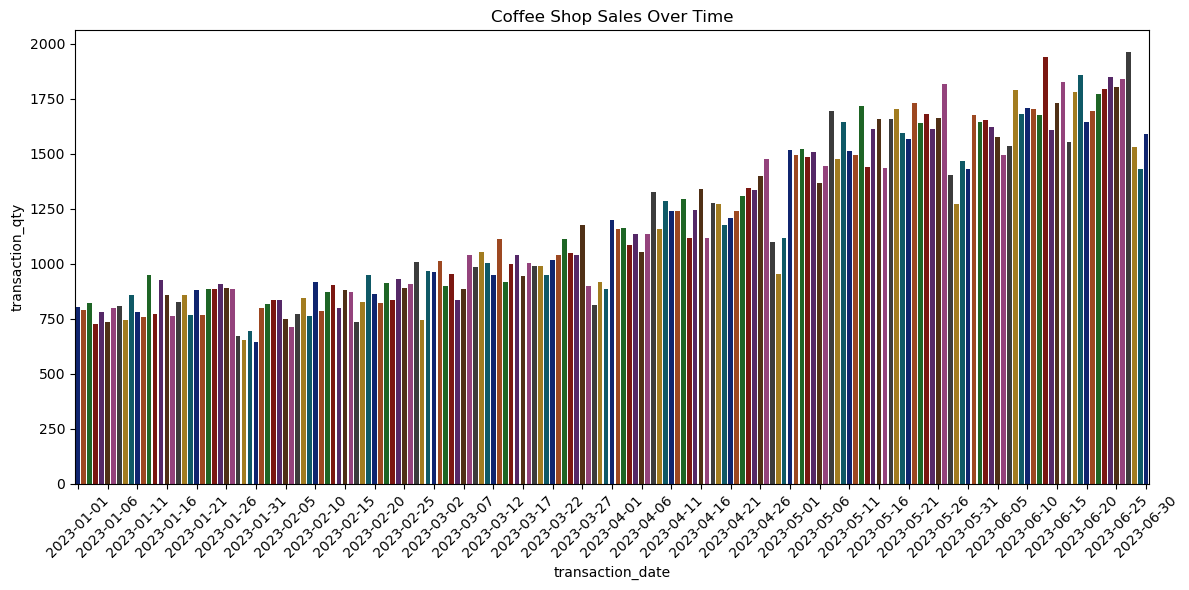

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(x='transaction_date', y='transaction_qty', data=sales_data, palette='dark')
plt.title('Coffee Shop Sales Over Time')
plt.xlabel('transaction_date')
plt.ylabel('transaction_qty')
plt.xticks(ticks=sales_data.index[::5], labels=sales_data['transaction_date'].dt.strftime('%Y-%m-%d')[::5], rotation=45)
plt.tight_layout()
plt.show()


In [17]:
# We want to plot sales by day of the week

In [19]:
#We group by 'days of the week' and sum the transaction quantities

In [49]:
sales_per_weekday = data.groupby('week day')['transaction_qty'].sum().reset_index()

In [43]:
# We reorder 'week day' for proper visualization

In [51]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_per_weekday['week day'] = pd.Categorical(sales_per_weekday['week day'], categories=days_order, ordered=True)
sales_per_weekday = sales_per_weekday.sort_values('week day')

In [61]:
#Plotting 'Total Sales by Day of the week'

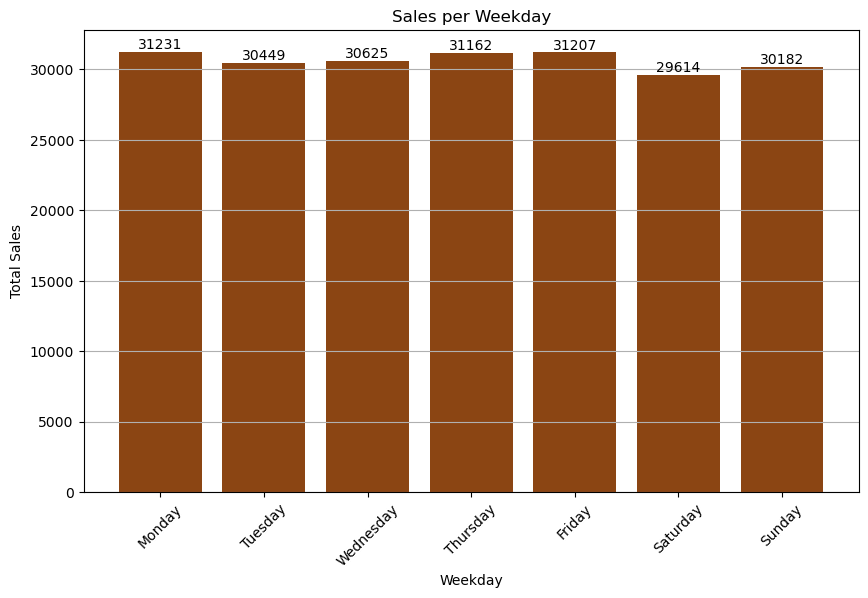

In [53]:
plt.figure(figsize=(10, 6))
bars = plt.bar(sales_per_weekday['week day'], sales_per_weekday['transaction_qty'], color = 'saddlebrown')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title('Sales per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [59]:
# We wish to plot which product category is the most sold, using a pie chart

In [61]:
# We group and sum transaction quantities by product category

In [55]:
category_sales = data.groupby('product_category')['transaction_qty'].sum().sort_values()

In [57]:
category_sales

product_category
Packaged Chocolate      487
Branded                 776
Loose Tea              1210
Coffee beans           1828
Flavours              10511
Drinking Chocolate    17457
Bakery                23214
Tea                   69737
Coffee                89250
Name: transaction_qty, dtype: int64

In [77]:
# We define which categories to show 

In [59]:
top_categories = category_sales.nlargest(5)   # Top 5 categories
other_sales = category_sales.sum() - top_categories.sum()  # Sum of other categories


In [81]:
# Create a new series including only top categories and "Other"

In [61]:
labels = top_categories.index.tolist() + ['Other']
sizes = top_categories.tolist() + [other_sales]

In [63]:
top_categories

product_category
Coffee                89250
Tea                   69737
Bakery                23214
Drinking Chocolate    17457
Flavours              10511
Name: transaction_qty, dtype: int64

In [85]:
# We create the pie chart

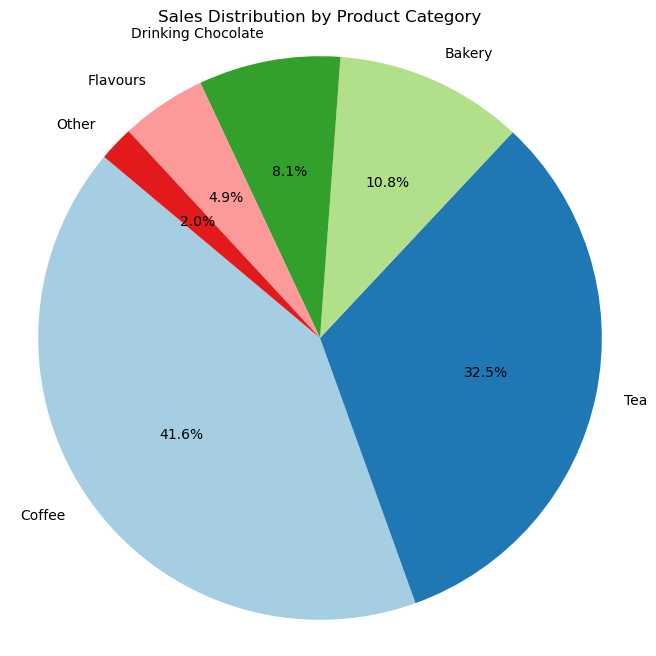

In [65]:
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct = '%1.1f%%',
       startangle=140, colors=plt.cm.Paired.colors)
plt.title('Sales Distribution by Product Category')
plt.axis('equal')
plt.show()

In [87]:
# We build a bar chart to show sales during the three different
# time periods of the day: morning, afternoon and evening; and which product type
# is the most sold

In [89]:
# First, we aggregate transaction quantities by time period

In [67]:
sales_by_time = data.groupby('time period')['transaction_qty'].sum()

In [69]:
sales_by_time

time period
afternoon     76540
evening       20301
morning      117629
Name: transaction_qty, dtype: int64

In [73]:
# Next, we count transactions by product type for each time period

In [71]:
morning_counts = data.loc[data['time period'] == 'morning'].groupby('product_type')['transaction_qty'].count()
afternoon_counts = data.loc[data['time period'] == 'afternoon'].groupby('product_type')['transaction_qty'].count()
evening_counts = data.loc[data['time period'] == 'evening'].groupby('product_type')['transaction_qty'].count()


In [83]:
# We combine counts into a DataFrame for easy plotting

In [75]:
counts_df = pd.DataFrame({
    'Morning': morning_counts,
    'Afternoon': afternoon_counts,
    'Evening': evening_counts
}).fillna(0)

In [79]:
#We want to show the top 5 product type sold buy time period

In [81]:
top_n = 5 
counts_df = counts_df.nlargest(top_n, 'Morning')

In [83]:
# Plottting the data

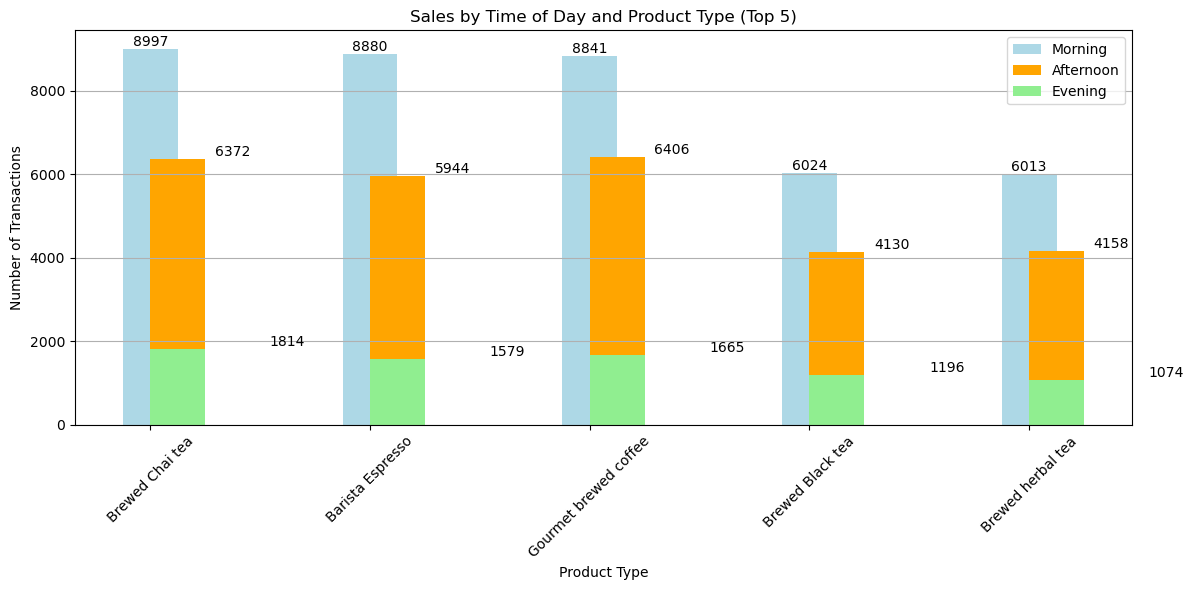

In [85]:
plt.figure(figsize=(12, 6))
bars_morning = plt.bar(counts_df.index, counts_df['Morning'], label='Morning', color='lightblue', width=0.25, align='center')
bars_afternoon = plt.bar(counts_df.index, counts_df['Afternoon'], label='Afternoon', color='orange', width=0.25, align='edge' )
bars_evening = plt.bar(counts_df.index, counts_df['Evening'], label='Evening', color='lightgreen', width=0.25, align='edge')

for bar in bars_morning:
    yval=bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

for bar in bars_afternoon:
    yval= bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 + 0.25, yval, int(yval), ha='center', va='bottom')

for bar in bars_evening:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 + 0.5, yval, int(yval), ha='center', va='bottom')

plt.title('Sales by Time of Day and Product Type (Top 5)')
plt.xlabel('Product Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
    